In [1]:
 # Présentation contexte (Nb pokémons, caractéristique, problèmatique)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Données//pokemon-data.csv', delimiter=';')
mdf = pd.read_csv('Données//move-data.csv', delimiter=',')
pdf = pd.read_csv('Données//pokemon.csv', delimiter=',')

In [3]:
df.columns = ['name', 'types', 'abilities', 'tier', 'hp', 'atk', 'def', 'spa', 'spd', 'spe', 'next_evos','moves']
df.loc[df.tier == 'OUBL','tier'] = 'Uber'
df.loc[df.tier == 'UUBL','tier'] = 'OU'
df.loc[df.tier == 'RUBL','tier'] = 'UU'
df.loc[df.tier == 'NUBL','tier'] = 'RU'
df.loc[df.tier == 'PUBL','tier'] = 'NU'
df = df[df['tier'].isin(['Uber', 'OU', 'UU', 'NU', 'RU', 'PU'])]
df['bst'] = df['hp'] + df['atk'] + df['def'] + df['spa'] + df['spd'] + df['spe']
tiers = ['Uber', 'OU', 'UU', 'RU', 'NU', 'PU']                                                                      
df.loc[df['tier'] == "Uber", "tier_rank"] = 0
df.loc[df['tier'] == "OU", "tier_rank"] = 1
df.loc[df['tier'] == "UU", "tier_rank"] = 2
df.loc[df['tier'] == "RU", "tier_rank"] = 3
df.loc[df['tier'] == "NU", "tier_rank"] = 4
df.loc[df['tier'] == "PU", "tier_rank"] = 5
df = df.astype({'tier_rank': int})
df['moves'] = df.apply(lambda x: set(x.moves), axis=1)

In [42]:
final_df = pd.merge(df, pdf, on='name')
final_df.head()

,name,types,abilities_x,tier,hp_x,atk,def,spa,spd,spe,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,Abomasnow,"['Grass', 'Ice']","['Snow Warning', 'Soundproof']",PU,90,92,75,92,85,60,...,50.0,460,132,105,30,grass,ice,135.5,4,0
1,Absol,['Dark'],"['Justified', 'Pressure', 'Super Luck']",PU,65,130,60,75,60,75,...,50.0,359,115,60,115,dark,NaN,47.0,3,0
2,Accelgor,['Bug'],"['Hydration', 'Sticky Hold', 'Unburden']",NU,80,70,40,100,60,145,...,50.0,617,100,60,145,bug,NaN,25.3,5,0
3,Aegislash,"['Steel', 'Ghost']",['Stance Change'],Uber,60,50,150,50,150,60,...,50.0,681,150,50,60,steel,ghost,53.0,6,0
4,Aerodactyl,"['Rock', 'Flying']","['Pressure', 'Rock Head', 'Unnerve']",RU,80,105,65,60,75,130,...,88.1,142,70,95,150,rock,flying,59.0,1,0


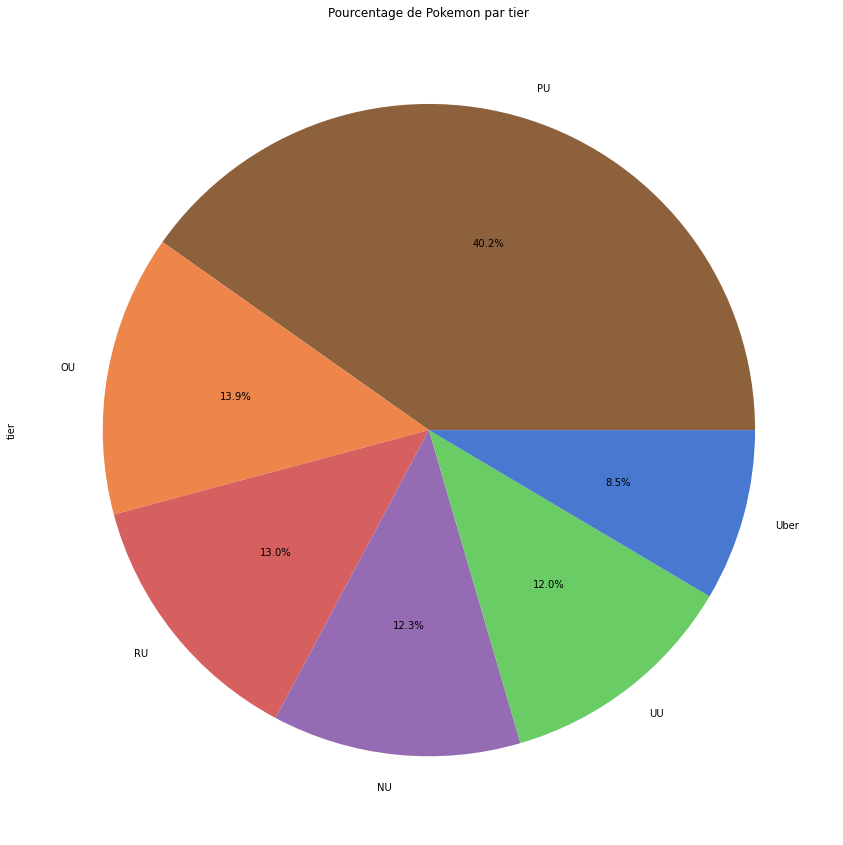

In [13]:
fig, ax = plt.subplots(figsize=(15, 15))
c = sns.color_palette('muted')
c = [c[5], c[1], c[3], c[4], c[2], c[0]]

ax = df.tier.value_counts().plot(kind='pie', autopct='%1.1f%%', colors=c, title='Pourcentage de Pokemon par tier')

[Text(0.5, 0, 'Tier'),
 Text(0, 0.5, 'Moyenne des statistiques'),
 Text(0.5, 1.0, 'Moyenne des statistiques selon le tier')]

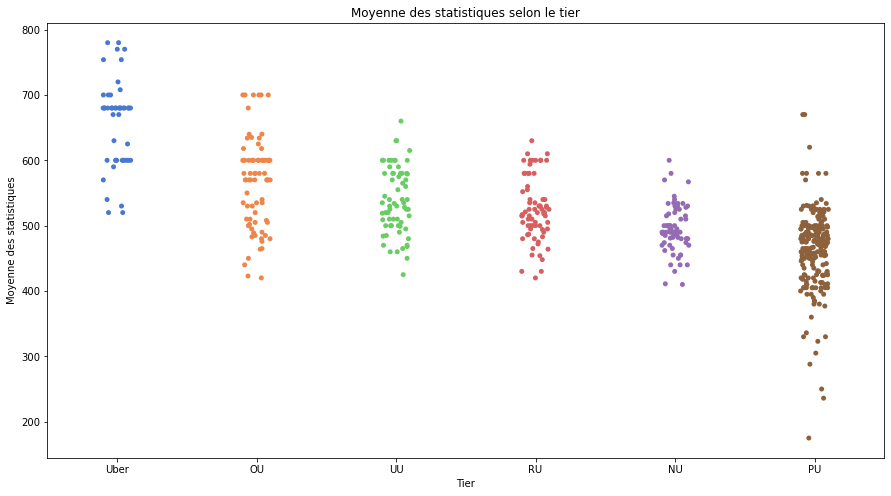

In [14]:
ax = plt.subplots(figsize=(15,8))
g2 = sns.stripplot(data=df, x='tier', y='bst', order=tiers, palette="muted", ax=ax[1])
ax[1].set(xlabel='Tier', ylabel='Moyenne des statistiques', title='Moyenne des statistiques selon le tier')

[Text(0.5, 0, 'Tier'),
 Text(0, 0.5, 'Moyenne des statistiques'),
 Text(0.5, 1.0, 'Moyenne des statistiques selon le tier')]

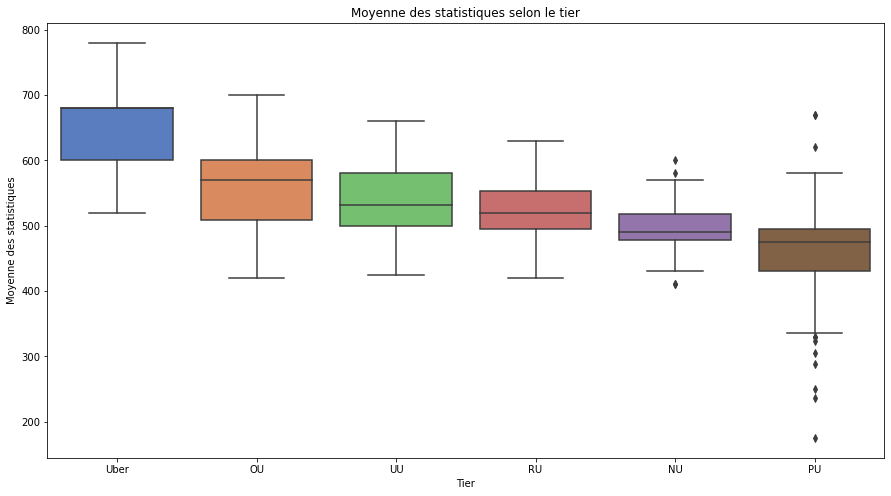

In [15]:
ax = plt.subplots(figsize=(15,8))
g2 = sns.boxplot(data=df, x='tier', y='bst', order=tiers, palette="muted", ax=ax[1])
ax[1].set(xlabel='Tier', ylabel='Moyenne des statistiques', title='Moyenne des statistiques selon le tier')

[Text(0.5, 0, 'Tier'),
 Text(0, 0.5, 'Moyenne des statistiques'),
 Text(0.5, 1.0, 'Moyenne des statistiques selon le tier')]

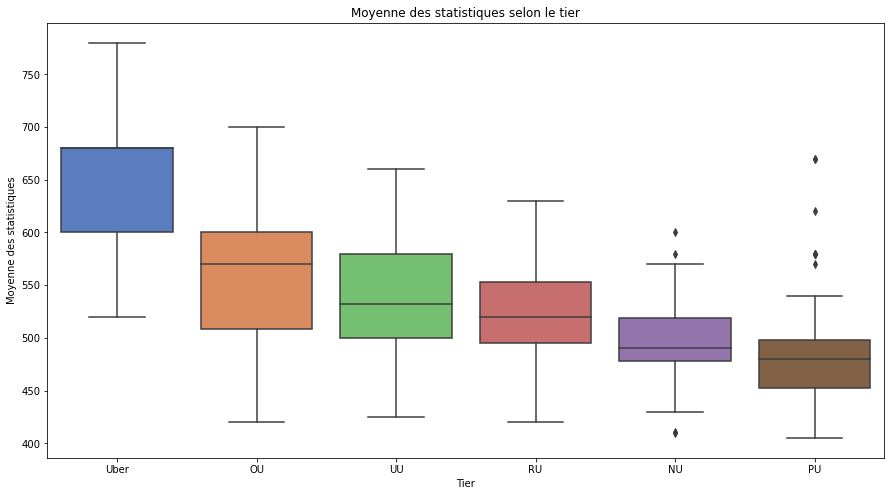

In [16]:
ax = plt.subplots(figsize=(15,8))
df_abe = df[(df['bst'] > 400)]
g2 = sns.boxplot(data=df_abe, x='tier', y='bst', order=tiers, palette="muted", ax=ax[1])
ax[1].set(xlabel='Tier', ylabel='Moyenne des statistiques', title='Moyenne des statistiques selon le tier')

In [17]:
df['moveset'] = [len(a) for a in df.moves]

[Text(0.5, 0, 'Tier'),
 Text(0, 0.5, 'Moyenne des moveset'),
 Text(0.5, 1.0, 'Moyenne des moveset selon le tier')]

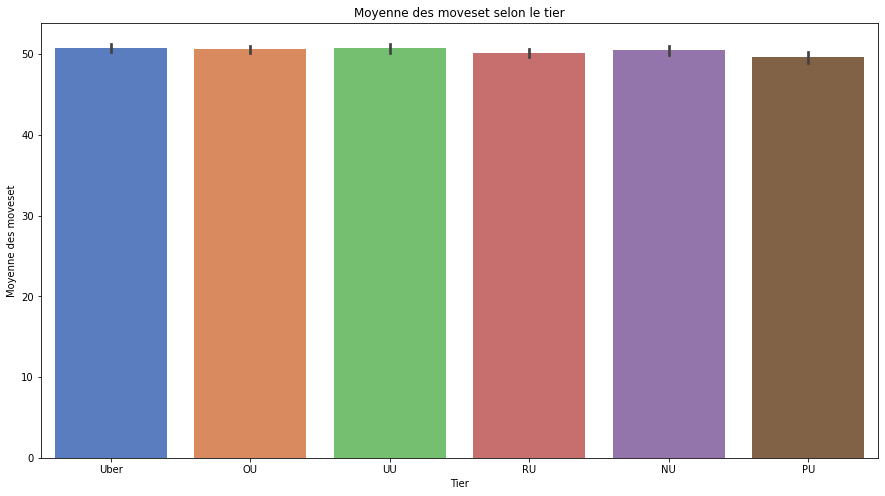

In [18]:
ax = plt.subplots(figsize=(15,8))
g2 = sns.barplot(data=df, x='tier', y='moveset', order=tiers, palette="muted", ax=ax[1])
ax[1].set(xlabel='Tier', ylabel='Moyenne des moveset', title='Moyenne des moveset selon le tier')

<AxesSubplot:>

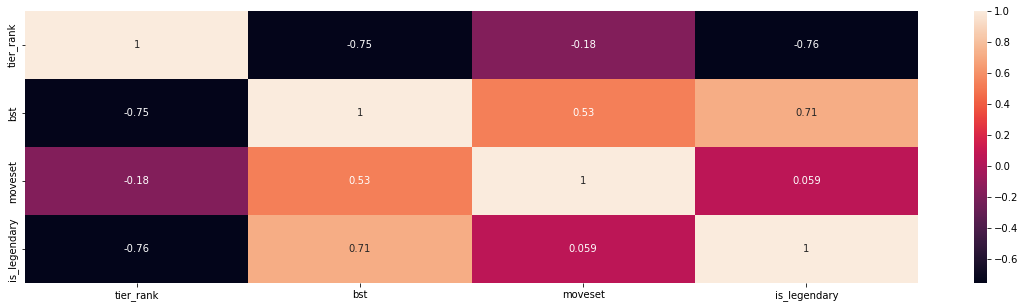

In [46]:
hex_df = final_df[["tier_rank", 'bst', 'moveset', 'is_legendary']].sample(n=50)
corr_df = hex_df.corr()
f, ax = plt.subplots(figsize=(20,5))
sns.heatmap(corr_df, annot=True, ax =ax)

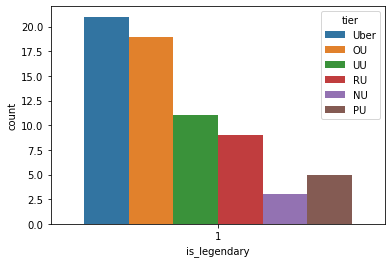

In [41]:
df_leg = final_df[final_df["is_legendary"] == 1]
fig = sns.countplot(data=df_leg, x="is_legendary", hue="tier", hue_order=tiers)

In [43]:
final_df["against_fire"].head()

0    4.0
1    1.0
2    2.0
3    2.0
4    0.5
Name: against_fire, dtype: float64